In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Day5_CNN.ipynb
./cats_and_dogs_filtered/vectorize.py
./cats_and_dogs_filtered/validation/dogs/dog.2043.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2122.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2474.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2123.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2252.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2171.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2467.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2113.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2485.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2451.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2410.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2234.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2063.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2362.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2309.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2236.jpg
./cats_and_dogs_filtered/validation/dogs/dog.2203.jpg
./cats_and_dogs_filtered/va

./cats_and_dogs_filtered/train/cats/cat.40.jpg
./cats_and_dogs_filtered/train/cats/cat.389.jpg
./cats_and_dogs_filtered/train/cats/cat.109.jpg
./cats_and_dogs_filtered/train/cats/cat.286.jpg
./cats_and_dogs_filtered/train/cats/cat.740.jpg
./cats_and_dogs_filtered/train/cats/cat.803.jpg
./cats_and_dogs_filtered/train/cats/cat.846.jpg
./cats_and_dogs_filtered/train/cats/cat.192.jpg
./cats_and_dogs_filtered/train/cats/cat.787.jpg
./cats_and_dogs_filtered/train/cats/cat.596.jpg
./cats_and_dogs_filtered/train/cats/cat.712.jpg
./cats_and_dogs_filtered/train/cats/cat.785.jpg
./cats_and_dogs_filtered/train/cats/cat.333.jpg
./cats_and_dogs_filtered/train/cats/cat.204.jpg
./cats_and_dogs_filtered/train/cats/cat.258.jpg
./cats_and_dogs_filtered/train/cats/cat.441.jpg
./cats_and_dogs_filtered/train/cats/cat.799.jpg
./cats_and_dogs_filtered/train/cats/cat.742.jpg
./cats_and_dogs_filtered/train/cats/cat.445.jpg
./cats_and_dogs_filtered/train/cats/cat.537.jpg
./cats_and_dogs_filtered/train/cats/cat.1

In [4]:
import tensorflow as tf

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
train_dataset = datagen.flow_from_directory("./cats_and_dogs_filtered/train",target_size=(224,224),classes=['dogs','cats'],subset="training")

Found 1600 images belonging to 2 classes.


In [7]:
validation_dataset = datagen.flow_from_directory("./cats_and_dogs_filtered/validation",target_size=(224,224),classes=['dogs','cats'],subset="validation")

Found 200 images belonging to 2 classes.


In [8]:
### Transfer learning
xception = tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3),pooling="avg")
xception_op = xception.output
x = tf.keras.layers.Dropout(0.4)
x = tf.keras.layers.Dense(units=2,activation="softmax")(xception_op)
model = tf.keras.models.Model(xception.input,x)
model.compile(tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),loss="categorical_crossentropy",metrics=['accuracy'])

In [9]:
steps_per_epoch = train_dataset.samples/32
validation_steps = validation_dataset.samples/32

In [10]:
model_training = model.fit(train_dataset,epochs=3,validation_data=validation_dataset,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps)

Train for 50.0 steps, validate for 6.25 steps
Epoch 1/3
50/50 [==============================] - 748s 15s/step - loss: 0.5067 - accuracy: 0.7950 - val_loss: 0.1867 - val_accuracy: 0.9750
Epoch 2/3
50/50 [==============================] - 742s 15s/step - loss: 0.2336 - accuracy: 0.9588 - val_loss: 0.1083 - val_accuracy: 0.9750
Epoch 3/3
50/50 [==============================] - 731s 15s/step - loss: 0.1415 - accuracy: 0.9706 - val_loss: 0.0899 - val_accuracy: 0.9750


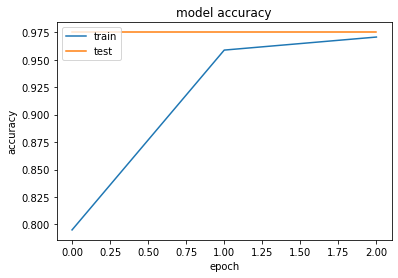

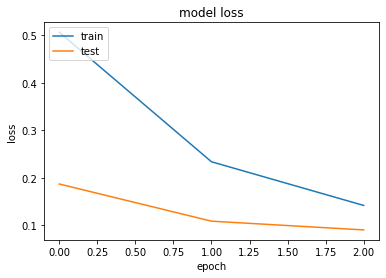

In [13]:
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(5,5),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(padding="same"))
model.add(tf.keras.layers.Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.GlobalMaxPool2D())
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))          
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       7

In [16]:
model.compile(tf.keras.optimizers.Adam(0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [21]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps)

Train for 50.0 steps, validate for 6.25 steps
Epoch 1/10
50/50 [==============================] - 49s 980ms/step - loss: 0.6296 - accuracy: 0.6413 - val_loss: 0.6768 - val_accuracy: 0.6950
Epoch 2/10
50/50 [==============================] - 48s 953ms/step - loss: 0.6061 - accuracy: 0.6712 - val_loss: 0.6966 - val_accuracy: 0.6350
Epoch 3/10
50/50 [==============================] - 49s 970ms/step - loss: 0.5841 - accuracy: 0.7013 - val_loss: 0.6395 - val_accuracy: 0.6950
Epoch 4/10
50/50 [==============================] - 46s 927ms/step - loss: 0.5727 - accuracy: 0.6869 - val_loss: 0.6649 - val_accuracy: 0.6500
Epoch 5/10
50/50 [==============================] - 46s 923ms/step - loss: 0.5395 - accuracy: 0.7369 - val_loss: 0.6403 - val_accuracy: 0.6700
Epoch 6/10
50/50 [==============================] - 45s 897ms/step - loss: 0.4912 - accuracy: 0.7650 - val_loss: 0.6238 - val_accuracy: 0.7100
Epoch 7/10
50/50 [==============================] - 46s 917ms/step - loss: 0.4705 - accuracy: 0.

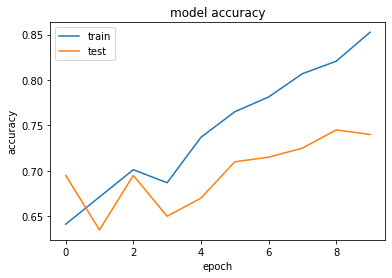

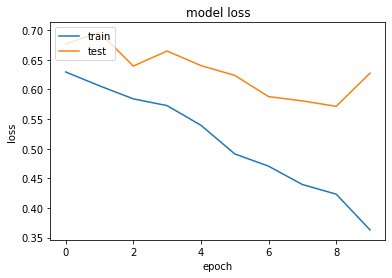

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()